<a href="https://colab.research.google.com/github/ioos/ioos_metrics/blob/main/notebooks/run_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating the IOOS By The Numbers

[Website](https://ioos.noaa.gov/about/ioos-by-the-numbers/)

[Spreadsheet](https://docs.google.com/spreadsheets/d/1AUfXmc3OwxpVdeMNjZyTGWjyR4ku3kRD5eexNrMORnI/edit#gid=516871794)

In [1]:
!pip install ioos_metrics

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 7.2 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=147af1450e91228e95b1773c6b9d40feebe400d4ce67b4a23d1ed381a95c52bb
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


In [2]:
%%time
from ioos_metrics.ioos_metrics import update_metrics

ioos_btn_df = update_metrics()
ioos_btn_df.tail()

CPU times: user 1.88 s, sys: 412 ms, total: 2.29 s
Wall time: 19.1 s


,date_UTC,Federal Partners,Regional Associations,HF Radar Stations,NGDAC Glider Days,National Platforms,Regional Platforms,ATN Deployments,MBON Projects,OTT Projects,HAB Pilot Projects,QARTOD Manuals,IOOS Core Variables,Metadata Records,IOOS,COMT Projects
2,2022-07-08,17,11,165,55448,764,517,4444,6,8,9,13,34,6217,1,5
3,2022-10-05,17,11,165,59088,390,635,4444,6,8,9,13,34,24499,1,5
4,2023-01-05,17,11,165,62042,768,635,4444,6,8,9,13,34,11840,1,5
5,2024-01-26,17,11,165,61990,721,886,5190,5,8,11,13,34,42599,1,5
6,2025-01-23,17,11,165,74178,731,1081,6136,10,21,11,13,34,37475,1,5


In [4]:
for field in ioos_btn_df:
  print('{}: {}'.format(field,ioos_btn_df[field].iloc[-1]))

date_UTC: 2025-01-23
Federal Partners: 17
Regional Associations: 11
HF Radar Stations: 165
NGDAC Glider Days: 74178
National Platforms: 731
Regional Platforms: 1081
ATN Deployments: 6136
MBON Projects: 10
OTT Projects: 21
HAB Pilot Projects: 11
QARTOD Manuals: 13
IOOS Core Variables: 34
Metadata Records: 37475
IOOS: 1
COMT Projects: 5


## Analysis

Now we have the opportunity to do some analysis on the metrics we've captured.

Below is an attempt to draw some comparisons between the metrics in the previous iteration and subsequent runs.

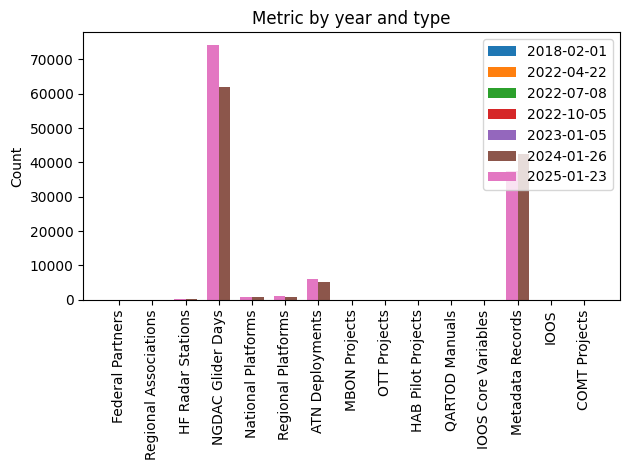

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option("future.no_silent_downcasting", True)

ioos_btn_df["date_UTC"] = pd.to_datetime(ioos_btn_df["date_UTC"])
ioos_btn_df = ioos_btn_df.fillna(np.nan)

labels = ioos_btn_df.drop(columns=["date_UTC"]).columns.tolist()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

for _, row in ioos_btn_df.iterrows():
    means = row.drop(index=["date_UTC"]).to_numpy()
    rects = ax.bar(
        x - width / 2,
        means,
        width,
        label=row["date_UTC"].strftime("%Y-%m-%d"),
    )
    width = width * -1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Count")
ax.set_title("Metric by year and type")
ax.set_xticks(x, labels)
ax.legend()

ax.xaxis.set_ticklabels(labels, rotation=90)
fig.tight_layout()

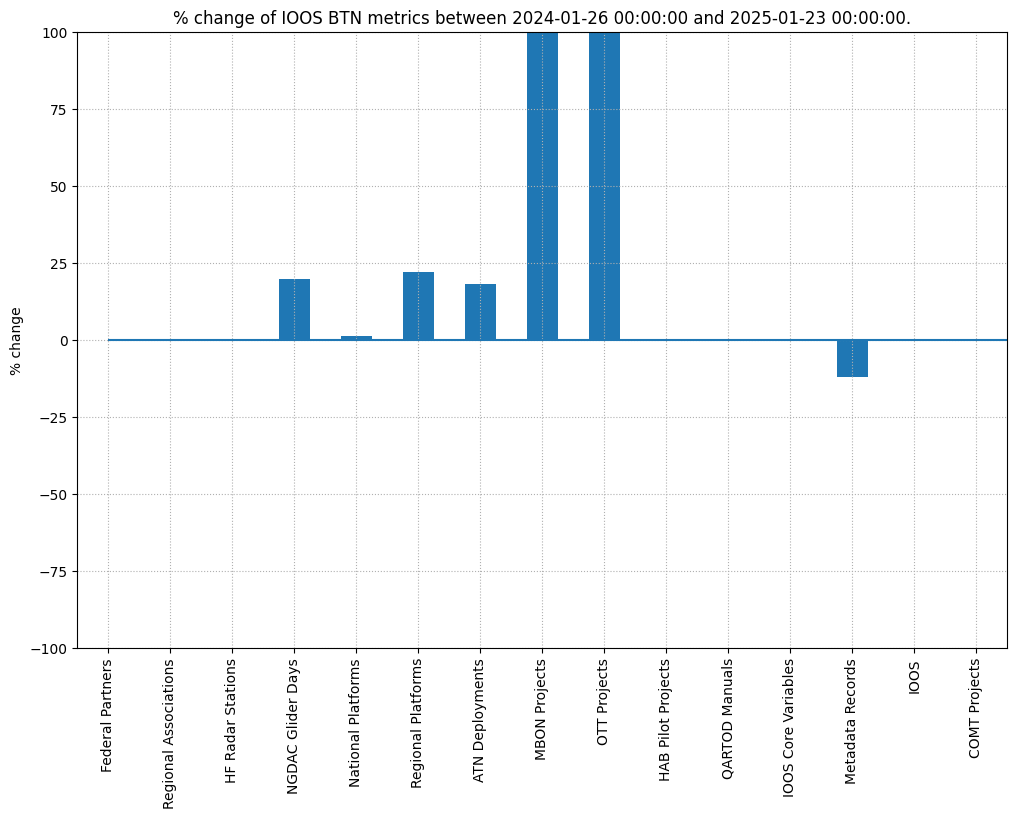

In [6]:
inc_df = ioos_btn_df.drop(columns=["date_UTC"])

increase = inc_df.iloc[-1] - inc_df.iloc[-2]
pcnt_increase = (increase / inc_df.iloc[-2]) * 100

fig, ax = plt.subplots(figsize=(12, 8))
width = 0.35
pcnt_increase.plot(kind="bar", ax=ax, ylabel="% change")

plt.grid(visible=True, linestyle=":")
ax.set_ylim(-100, 100)
ax.set_title(
    f"% change of IOOS BTN metrics between {ioos_btn_df['date_UTC'].iloc[-2]} and {ioos_btn_df['date_UTC'].iloc[-1]}.",
)
plt.hlines(0, xmin=0, xmax=len(pcnt_increase), linestyles="solid")